In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in data

df_wsm = pd.read_csv('wsm.csv')
df_yem = pd.read_csv('yem.csv')
df_zaf = pd.read_csv('zaf.csv')
df_zmb = pd.read_csv('zmb.csv')
df_zwe = pd.read_csv('zwe.csv')

df = pd.concat([df_wsm,df_yem,df_zaf,df_zmb,df_zwe], ignore_index=True) 

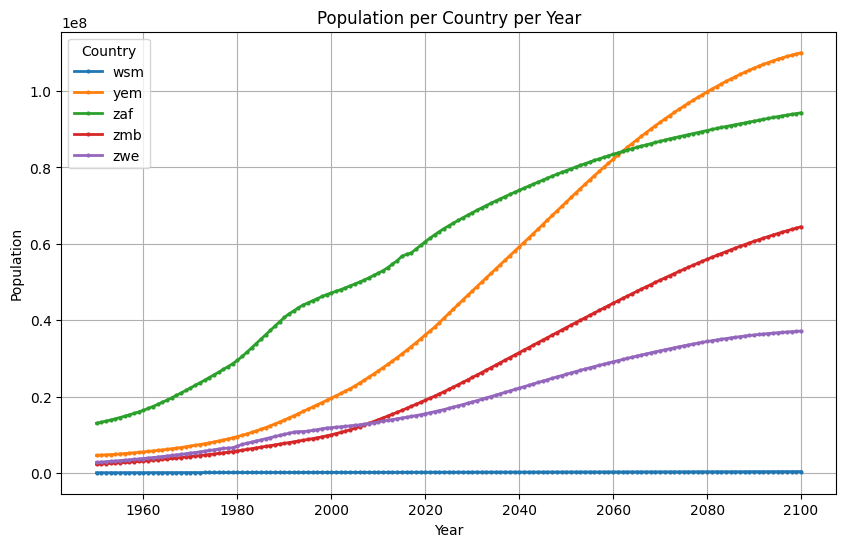

In [3]:
### Create a line plot comparing total population over time:
# choose 5 countries: wsm, yem, zaf, zmb, zwe 

# total population by country for each year

# groups by year and sums the population values of each group 
df_pop = df.groupby(['country', 'year'])['population'].sum().reset_index()
df_pop = df_pop.sort_values(['country', 'year'])
# display(df_pop.head()) 

import matplotlib.pyplot as plt  

# Line plot showing population trends
# Include a legend 
plt.figure(figsize=(10, 6))

for country,data in df_pop.groupby('country'):
    plt.plot(
        data["year"],
        data["population"],
        marker = 'o',
        markersize=2,
        linewidth=2,
        label = country
)

plt.title('Population per Country per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()


plt.legend(title='Country')
plt.show() 

In [ ]:
# 2. Investigate demographic shifts using a stacked bar chart:
#    - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
#    - Create a stacked bar chart showing these changes
#    - Calculate and display the percentage for each age group
#    - Add text annotations showing key percentages
#    - Include clear labels and a legend

ageDist = [0, 14, 30, 45, 65, float('inf')] 
ageLabels = ['0-14', '15-30', '31-45', '46-65', '66+']

df.set_index('year', inplace = True)

stackBar = df.plot(kind = 'bar',
                   stacked = True,
                   figsize = (10,6),
                   colormap = 'viridis',
                   width = 0.7)

plt.title("Demographic Shifts in Age Distribution (1950, 1985, 2020)")
plt.xlabel("Year")
plt.ylabel("Population Distribution (%)")
plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Tips for seaborn:
- Set the style before plotting: sns.set_style("whitegrid")
- Use built-in color palettes: sns.color_palette("husl", 8)

Age Group
66+      52850
46-65    30200
15-30    24160
31-45    22650
0-14     21140
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap of Age Distribution Across 5 Countries')

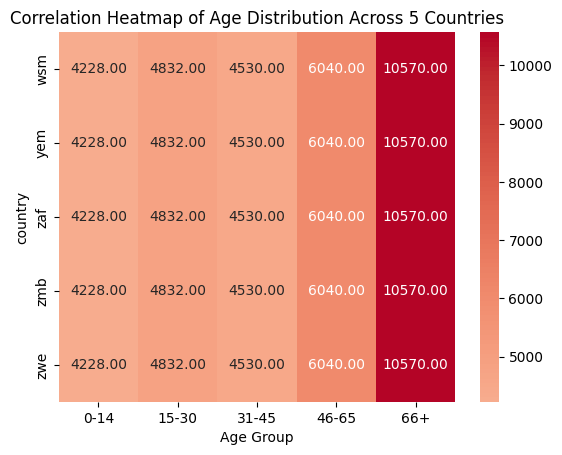

In [ ]:
# 1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
#    - Use seaborn's heatmap function
#    - Add clear annotations and labels
#    - Write a brief explanation of what the heatmap reveals about the population structure

ageDist = [0, 14, 30, 45, 65, float('inf')] 
ageLabels = ['0-14', '15-30', '31-45', '46-65', '66+']

df['Age Group'] = pd.cut(df['age'], bins=ageDist, labels=ageLabels) 
ageCounts = df['Age Group'].value_counts()
print(ageCounts) 

contingencyTable = pd.crosstab(df['country'], df['Age Group']) # have to create contingency table as we are looking at 2 categorical columns 

ageCountryDist = sns.heatmap(contingencyTable, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
ageCountryDist.set_title('Correlation Heatmap of Age Distribution Across 5 Countries')

#    - Write a brief explanation of what the heatmap reveals about the population structure 

In [ ]:
# 2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
#    - Create side-by-side violin plots using seaborn
#    - Add clear labels and a title
#    - Write a brief comparison of what the plots reveal 

In [ ]:
# 3. Create a pairplot comparing population metrics across four countries:
#    - Select four countries of your choice
#    - Include all variables in the dataset
#    - Use the country as the hue parameter to distinguish between countries
#    - Write a brief summary of any patterns or relationships revealed by the pairplot

## Part 3: Open-ended, not required

Create a visualization using either plotnine, streamlit, or plotly dash. Here are some concrete examples:

### Using plotnine
Create a series of statistical plots that show:
- Population trends over time using smooth trend lines
- Faceted views comparing multiple countries or regions
- Clear themes and styling following the Grammar of Graphics

### Using streamlit
Build an interactive dashboard that lets users:
- Select 2-3 countries from a dropdown menu
- View their total populations over time as a line chart
- Show a data table with key statistics
- Add filters for specific years or age groups

### Using plotly dash
Create an interactive application that:
- Shows population distribution across age groups
- Lets users switch between different years using a slider
- Updates automatically when selections change

## Tips

- Pay attention to color choices and accessibility
- Make sure your visualizations are easy to understand
- Include appropriate titles and labels
- Consider the story your visualizations tell about the data
- For the bonus question, focus on creating an engaging user experience